# TOTA Visitor Centres data exploration  

This notebook contains the initial exploration and visualization of vistiors centres' indicators.



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math

## Load data.  
Data stored in the shared drive folder, not in definitive format (still in progress).  
For this example, the data used corresponds to the **Thompson Okanagan (TOTA) region**.

In [2]:
sheet_id = "14SA0yGF6GJ76d-uuupYZ9wwjcKHSbAd8f_8NFNBwvQI"
sheet_name = "Modified_data"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
visitors = pd.read_csv(url)
visitors.head()

,year,indicator,January,February,March,Q1 Total,April,May,June,Q2 Total,July,August,September,Q3 Total,October,November,December,Q4 Total
0,2022,Parties Per Hour,0.80,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2021,Parties Per Hour,1.38,1.56,2.10,1.72,1.83,1.71,2.80,2.24,4.22,4.04,3.99,4.10,2.78,1.76,1.99,2.24
2,2020,Parties Per Hour,1.98,2.23,2.26,2.13,1.23,1.12,2.77,2.26,4.94,4.95,4.54,4.84,2.54,1.82,1.67,2.09
3,2019,Parties Per Hour,2.09,2.19,2.50,2.27,3.00,4.79,6.39,5.04,7.47,8.03,7.03,7.57,3.16,2.47,2.21,2.70
4,2018,Parties Per Hour,1.97,1.92,2.52,2.16,2.73,4.56,5.95,4.70,6.86,7.04,6.61,6.86,3.43,1.99,2.12,2.64


## Prepare data.  

Define functions with basic transformation to filter by theh desired indicator and year, and get a table ready to be used easily for the plots.

In [23]:
#Get values by month

def prep_data_month(df, year, indicator):
    df_y = df[df['indicator'] == indicator].copy()
    
    df_y = df_y[df_y['year'] == year].\
            drop(columns=['indicator', 'Q1 Total', 'Q2 Total', 'Q3 Total','Q4 Total']).reset_index()
    df_y = df_y.transpose()
    df_y.reset_index(inplace = True)
    df_y = df_y.iloc[2:]
    df_y.rename(columns = {"index":"period", 0:"value"}, inplace = True)
    df_y['value'] = np.float64(df_y['value']).round(0)
    df_y['value'] = np.int64(df_y['value'])
    return df_y
    

In [4]:
indicator = 'Total Visitors'
year = 2019
prep_data_month(visitors, year, indicator)

,period,value
2,January,10872
3,February,10668
4,March,1496
5,April,18607
6,May,58259
7,June,92343
8,July,133967
9,August,141841
10,September,81811
11,October,2754


In [24]:
#Get values by quarter

def prep_data_quarter(df, year, indicator):
    df_y = df[df['indicator'] == indicator].copy()
    
    df_y = df_y[df_y['year'] == year][['year', 'Q1 Total', 'Q2 Total', 'Q3 Total','Q4 Total']].reset_index()
    df_y = df_y.transpose()
    df_y.reset_index(inplace = True)
    df_y = df_y.iloc[2:]
    df_y.rename(columns = {"index":"period", 0:"value"}, inplace = True)
    df_y['value'] = np.float64(df_y['value']).round(0)
    df_y['value'] = np.int64(df_y['value'])
   
    return df_y

In [6]:
prep_data_quarter(visitors, year, indicator)

,period,value
2,Q1 Total,365
3,Q2 Total,169209
4,Q3 Total,357619
5,Q4 Total,51911


## Plot data. 

Plot data for each of the indicators, based on the preliminary ideas:  
(note: all data for last pre-pandemic year (2019), except engagement which is first recent year with full data (2021)).  
- Total visitors (line for monthly data, bars for quarters)
- Total hours (line for monthly data)  
- Total buses (line for monthly data)  
- Parties per hour (line for monthly data)  
- Engagement (calls + emails + social media) (line for monthly data)

### 1) Total visitors

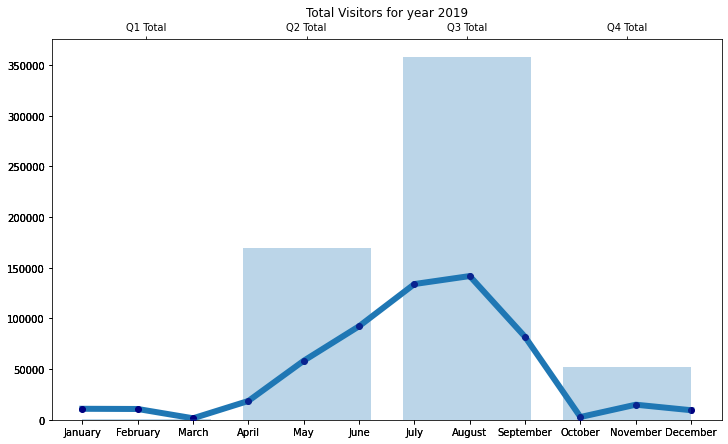

In [13]:
indicator = 'Total Visitors'
year = 2019


df_month = prep_data_month(visitors, year, indicator)
df_quarter = prep_data_quarter(visitors, year, indicator)
max_val = pd.Series([df_month['value'].max(),df_quarter['value'].max()]).max()
max_val = max_val + math.ceil(max_val * 0.05)

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot('period', 'value', data = df_month, lw = 6)
ax.set_ylim([0, max_val])
ax2.scatter('period', 'value', data = df_month, color = 'navy')
ax2.set_ylim([0, max_val])

ax3.bar('period', 'value', data = df_quarter, alpha = 0.3)
ax3.xaxis.tick_top()
ax3.set_ylim([0, max_val])

plt.title(f'{indicator} for year {year}')
plt.show()

### 2) Total hours

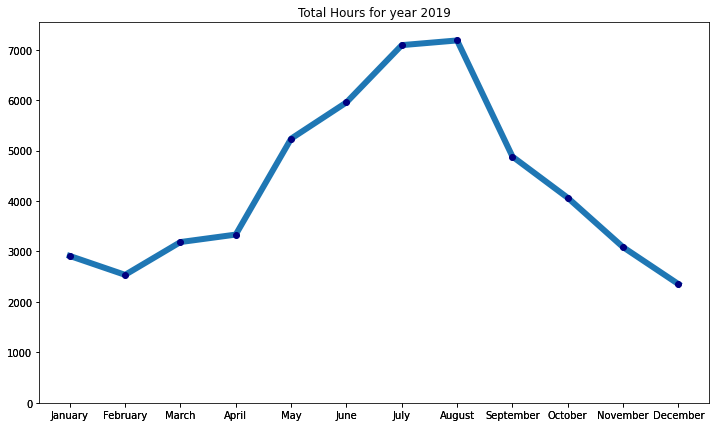

In [25]:
indicator = 'Total Hours'
year = 2019

#Define plotting function for all other indicators

def plot_data(indicator, year):
    df_month = prep_data_month(visitors, year, indicator)
    max_val = df_month['value'].max() + math.ceil(df_month['value'].max()*0.05)
    
    fig=plt.figure(figsize=(12,7))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    
    ax.plot('period', 'value', data = df_month, lw = 6)
    ax.set_ylim([0, max_val])
    ax2.scatter('period', 'value', data = df_month, color = 'navy')
    ax2.set_ylim([0, max_val])
    
    plt.title(f'{indicator} for year {year}')
    
    plt.show()

plot_data(indicator, year)  

### 3) Total buses

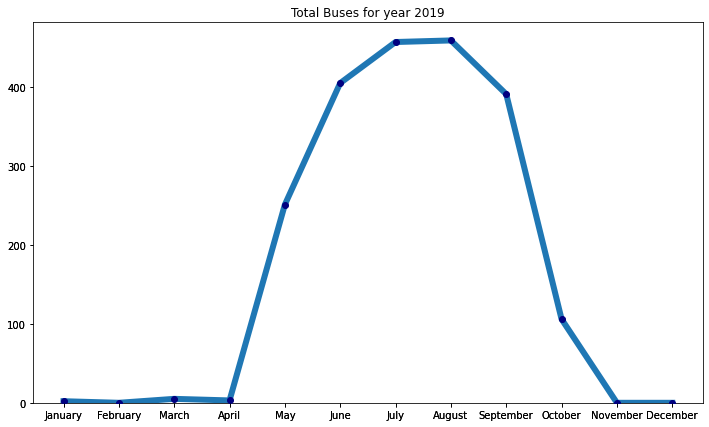

In [18]:
indicator = 'Total Buses'
year = 2019

plot_data(indicator, year)

### 4) Parties per hour

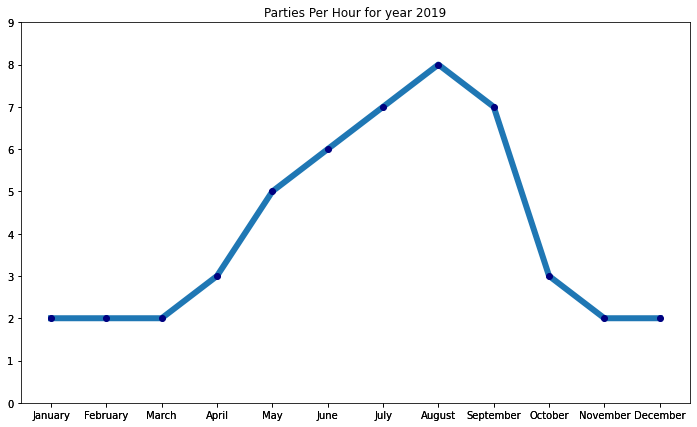

In [20]:
indicator = 'Parties Per Hour'
year = 2019

plot_data(indicator, year)

### 5) Engagement

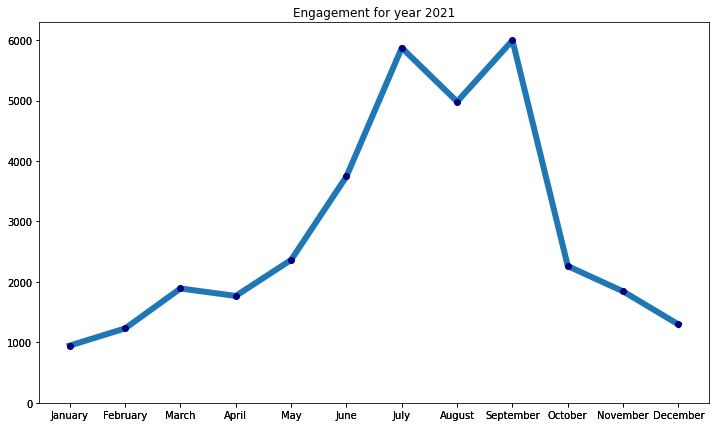

In [22]:
indicator = 'Engagement'
year = 2021

plot_data(indicator, year)